## Metadata

Goal of this file is to produce a combined metadata table and a separate one at the patient level focussing on variables of maximum interest.

In [184]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#needed for multiple merge
from functools import reduce

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [185]:
path="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/PPMI/Data/metadata/"
in_dat="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/PPMI/Data/"
data_gf="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/PPMI/Data/sf/"
data_out="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/PPMI/Data/Processed Data/"



In [186]:
# function to create df
def createdataf(file):
    l=files_csv.index(file)
    pat_stat=list_of_dfs[l]
    pat_stat['PATNO']=pat_stat["PATNO"].astype(str)
    return pat_stat

In [187]:
def summary_df(df,sumfields,renames):
    df_out=pd.DataFrame(df.groupby(sumfields).size()).reset_index()
    df_out.columns=renames
    return df_out

In [188]:
# print files with >n patients

def filesgnpats(n):
    filearray=np.array([])
    filearray_events=np.array([])
    for k in range(len(list_of_dfs)):
        if ("PATNO" in list_of_dfs[k].columns and list_of_dfs[k]["PATNO"].nunique()>n) or ("SUBJECT_ID" in list_of_dfs[k].columns and list_of_dfs[k]["SUBJECT_ID"].nunique()>n)  or \
        ("SUBJECT_NUMBER" in list_of_dfs[k].columns and list_of_dfs[k]["SUBJECT_NUMBER"].nunique()>n):
            filearray2=np.array([])
            #a=str(files_csv[k].shape)
            filearray2=[str(files_csv[k])]
            filearray=np.append(filearray,filearray2)
            if ("Event_ID" in list_of_dfs[k].columns and list_of_dfs[k]["Event_ID"].nunique()>n):
                filearray3=np.array([])
            #a=str(files_csv[k].shape)
                filearray3=[str(files_csv[k])]
                filearray_events=np.append(filearray,filearray3)
    return filearray,filearray_events
        #print(list_of_dfs[k].columns)
 

In [189]:

#file examiner
k=3#files_csv.index('Primary_Diagnosis.csv')

def file_examine(k,filenamedescs):
    display(files_csv[k])
    if "PATNO" in list_of_dfs[k].columns:
        print("distinct patno "+ str(list_of_dfs[k]["PATNO"].nunique()))
    if "SUBJECT_ID" in list_of_dfs[k].columns:
         print("distinct subid "+ str(list_of_dfs[k]["SUBJECT_ID"].nunique()))
    if "SUBJECT_NUMBER" in list_of_dfs[k].columns:
         print("distinct subid "+ str(list_of_dfs[k]["SUBJECT_NUMBER"].nunique()))
    print("Number of records "+str(list_of_dfs[k].shape))
    display(list_of_dfs[k].head())
    print(list_of_dfs[k].shape)
    out_dat=pd.DataFrame(filenamedescs[(filenamedescs['file']==files_csv[k])].groupby(["field","DSCR"]).size()).reset_index()
    display(out_dat)
    return out_dat


In [190]:
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv=sorted(files_csv)
#files_csv

In [191]:
list_of_dfs = [pd.read_csv(str(path)+str(filename)) for filename in files_csv]

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (13,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [192]:
len(list_of_dfs)

138

Put all columns and all filenames together for data dictionary

In [193]:
col_nm3=np.asarray([])
file_nm3=np.asarray([])

for i in range(len(list_of_dfs)):
    list_of_dfs[i]['filename']=files_csv[i]
    col_nm2=np.asarray([])
    file_nm2=np.asarray([])

    for j in range(len(list_of_dfs[i].columns)):
        col_nm=list_of_dfs[i].columns[j]
        file_nm=files_csv[i]
        
        col_nm2=np.append(col_nm2,col_nm)
        file_nm2=np.append(file_nm2,file_nm)
    col_nm3=np.append(col_nm3,col_nm2)
    file_nm3=np.append(file_nm3,file_nm2)
   

In [194]:
filecol_list=pd.DataFrame({"file":file_nm3,"field":col_nm3})
datadic=list_of_dfs[files_csv.index('Data_Dictionary.csv')]
filenamedescs=pd.merge(filecol_list,datadic[["ITM_NAME","DSCR"]],left_on="field",right_on="ITM_NAME",how='left')

In [195]:
#filenamedescs

Create a file which combines some of the key individual files examined above

In [196]:
#file_examine(files_csv.index('Primary_Diagnosis.csv'),filenamedescs)
#file_examine(4,filenamedescs)

List of files and notes:
1. AV-133_Image_Metadata.csv. 36 patients  ligands
2. AV-133_Imaging.csv 48 patients
3. AV-133_SBR_Results.csv 36 subjects

In [197]:
#%%capture cap --no-stderr
#with open('%s%s' % (path,'output.txt'), 'w') as f:    
#    for k in range(len(list_of_dfs)):
#        print(files_csv[k])
#        print(list_of_dfs[k].head())
#        print(list_of_dfs[k].shape)
#        print(filenamedescs[(filenamedescs['file']==files_csv[k])].groupby(["field","DSCR"]).size())
#        if "PATNO" in list_of_dfs[k].columns:
#            print(list_of_dfs[k]["PATNO"].nunique())
#        if "SUBJECT_ID" in list_of_dfs[k].columns:
#            print(list_of_dfs[k]["SUBJECT_ID"].nunique())
            

#    f.write(cap.stdout)

In [198]:
#countsfiles=pd.read_csv('%s%s' % (in_dat,"Listofcountsdata.csv"))
#countsfiles.shape
#countsfiles.head()

In [199]:
#pats_samp=pd.DataFrame(countsfiles.groupby("PATNO").size()).reset_index()
#pats_samp.columns=["PATNO","num_recs"]
#pats_samp

In [200]:
filesgnpats(100)

(array(['Adverse_Event_Log.csv', 'Benton_Judgment_of_Line_Orientation.csv',
        'Blood_Chemistry___Hematology.csv', 'Center-Subject_List.csv',
        'Clinical_Labs.csv', 'Clock_Drawing.csv',
        'Cognition_Function-Short_Form.csv', 'Cognitive_Assessments.csv',
        'Cognitive_Categorization.csv', 'Communication-Short_Form.csv',
        'Conclusion_of_Study_Participation.csv',
        'Concomitant_Medications.csv',
        'Contact_Information_Brain_Bank.csv',
        'Contact_Information_FOUND.csv',
        'Current_Biospecimen_Analysis_Results.csv',
        'Current_Medical_Conditions_Log.csv', 'DATScan_Analysis.csv',
        'DNA_Sample_Collection.csv', 'DTI_Regions_of_Interest.csv',
        'DaTSCAN_SPECT_Visual_Interpretation_Assessment.csv',
        'DaTscan_Imaging.csv', 'Deep_Brain_Stimulation.csv',
        'Deprecated_Biospecimen_Analysis_Results.csv',
        'Determination_of_Falls.csv', 'Device_Placement_Log.csv',
        'Diagnostic_Features.csv', 'Epworth_Slee

Current_Medical_Conditions_Log.csv

In [201]:
# GET 128 TYPES OF CURRENT MEDICAL CONDITIONS whre more than 15 patients have it, by patient
k=files_csv.index("Current_Medical_Conditions_Log.csv")
list_of_dfs[files_csv.index("Current_Medical_Conditions_Log.csv")]
df1=pd.DataFrame(list_of_dfs[k].groupby('LLT_NAME').size()).reset_index()
df1.columns=['LLT_NAME','recs']
df1=df1[(df1['recs']>15)]

patcons=pd.merge(list_of_dfs[k][['PATNO','LLT_NAME']],df1,on='LLT_NAME',how='inner')
patcons.sort_values(['PATNO','LLT_NAME'], inplace = True) 
  
# dropping ALL duplicte values 
patcons.drop_duplicates(subset =['PATNO','LLT_NAME'], 
                     keep = False, inplace = True) 
patcons['recs']=1
df2=pd.DataFrame(patcons.pivot(index='PATNO',columns='LLT_NAME',values='recs')).reset_index()
df2[pd.isnull(df2)]=0
df2.shape

(1591, 129)

Diagnostic Features

In [202]:
#Pat No and event as common identifiers here
Diagfeat=list_of_dfs[files_csv.index("Diagnostic_Features.csv")]
cols = Diagfeat.select_dtypes([np.number]).columns
cols=np.append(cols,'EVENT_ID')
Diagfeat_sel=Diagfeat[cols]
Diagfeat_sel.shape


(7909, 48)

#### UDPRS

In [203]:
UDPRS1=list_of_dfs[files_csv.index('MDS_UPDRS_Part_I.csv')]
UDPRS1['Date_UDPRS']=UDPRS1['INFODT']

UDPRS1=UDPRS1[['PATNO','Date_UDPRS', 'EVENT_ID','NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT','NP1DDS']]
print(UDPRS1.columns)
UDPRS1Q=list_of_dfs[files_csv.index('MDS_UPDRS_Part_I__Patient_Questionnaire.csv')]
UDPRS1Q=UDPRS1Q[['PATNO', 'EVENT_ID','NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST','NP1LTHD', 'NP1FATG']]
print(UDPRS1Q.columns)
UDPRS2Q=list_of_dfs[files_csv.index( 'MDS_UPDRS_Part_II__Patient_Questionnaire.csv')]
UDPRS2Q=UDPRS2Q[['PATNO', 'EVENT_ID','NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES',
       'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE',
       'NP2WALK', 'NP2FREZ']]
print(UDPRS2Q.columns)
UDPRS3=list_of_dfs[files_csv.index( 'MDS_UPDRS_Part_III.csv')]

UDPRS3=UDPRS3[['PATNO', 'EVENT_ID','NP3SPCH',
       'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL',
       'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL',
       'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT',
       'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML',
       'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL',
       'NP3RTALJ', 'NP3RTCON']]
print(UDPRS3.columns)
UDPRS4=list_of_dfs[files_csv.index('MDS_UPDRS_Part_IV.csv')]
UDPRS4=UDPRS4[['PATNO', 'EVENT_ID','NP4WDYSK', 'NP4DYSKI', 'NP4OFF', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN']]

print(UDPRS4.columns)

sumcols=['NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST','NP1LTHD', 'NP1FATG',
                      'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES',
       'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE',
       'NP2WALK', 'NP2FREZ','NP3SPCH',
       'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL',
       'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL',
       'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT',
       'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML',
       'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL',
       'NP3RTALJ', 'NP3RTCON']

udprs_dfs_list = [UDPRS1, UDPRS1Q, UDPRS2Q,UDPRS3,UDPRS4]
udprs = reduce(lambda  left,right: pd.merge(left,right,on=['PATNO','EVENT_ID'],
                                            how='outer'), udprs_dfs_list)

udprs['score']=udprs[sumcols].sum(axis=1)
udprs['count']=udprs[sumcols].count(axis=1)
udprs['score_adj']=udprs['score']*53/udprs['count']
udprs

Index(['PATNO', 'Date_UDPRS', 'EVENT_ID', 'NP1COG', 'NP1HALL', 'NP1DPRS',
       'NP1ANXS', 'NP1APAT', 'NP1DDS'],
      dtype='object')
Index(['PATNO', 'EVENT_ID', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN',
       'NP1CNST', 'NP1LTHD', 'NP1FATG'],
      dtype='object')
Index(['PATNO', 'EVENT_ID', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT',
       'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR',
       'NP2RISE', 'NP2WALK', 'NP2FREZ'],
      dtype='object')
Index(['PATNO', 'EVENT_ID', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU',
       'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR',
       'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR',
       'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR',
       'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU',
       'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON'],
      dtype='object')
Index(['PATNO', 'EVENT_ID', 'NP4WDYSK', 'NP

,PATNO,Date_UDPRS,EVENT_ID,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1SLPN,...,NP3RTCON,NP4WDYSK,NP4DYSKI,NP4OFF,NP4FLCTI,NP4FLCTX,NP4DYSTN,score,count,score_adj
0,3402,07/2010,SC,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,53,13.000000
1,3400,07/2010,BL,0.0,0.0,2.0,3.0,2.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,53,43.000000
2,3403,07/2010,SC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0,53,42.000000
3,3404,07/2010,BL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,53,4.000000
4,3406,07/2010,SC,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,53,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,3707,NaN,V04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,33,19.272727
15432,40731,NaN,V06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,33,35.333333
15433,40784,NaN,V05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,33,16.060606
15434,3005,NaN,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,33,8.030303


#### Analysis of Biospecimens

In [204]:
currbiospec=list_of_dfs[files_csv.index('Current_Biospecimen_Analysis_Results.csv')]
currbiospec['id']=currbiospec['PATNO'].astype(str)+currbiospec['CLINICAL_EVENT'].astype(str) +currbiospec['TESTNAME'].astype(str)
#currbiospec.TYPE.value_counts()
#currbiospec.groupby(['PATNO','TYPE']).size()

In [205]:
exc_csf=['below','above','<8','<80']
csf_names=["ABeta","CSF Alpha-synuclein","CSF Hemoglobin","pTau","tTau"]

csf1=pd.DataFrame(currbiospec[(currbiospec.TYPE=="Cerebrospinal Fluid")&
                         (currbiospec['TESTNAME'].isin(csf_names))].groupby(['PATNO','CLINICAL_EVENT','TESTNAME']).
                  agg({'TESTVALUE': max,'update_stamp':max})).reset_index()

csf2=pd.DataFrame(currbiospec[(currbiospec.TYPE=="Cerebrospinal Fluid")&
                         (currbiospec['TESTNAME'].isin(csf_names))].groupby(['PATNO','CLINICAL_EVENT']).
                  agg({'update_stamp':max})).reset_index()
csf1.columns=['PATNO','CLINICAL_EVENT','TESTNAME','VALUE','RUNDATE']
csf2.columns=['PATNO','CLINICAL_EVENT','RUNDATE']
#print(check[check['recs']>1].shape[0]/check.shape[0])
csf1=csf1[~(csf1['VALUE'].isin(exc_csf))]
csf1['id']=csf1['PATNO'].astype(str)+csf1['CLINICAL_EVENT'].astype(str)
csf2['id']=csf1['PATNO'].astype(str)+csf2['CLINICAL_EVENT'].astype(str)
csf1_piv=pd.DataFrame(csf1.pivot(index='id',columns='TESTNAME',values='VALUE')).reset_index()
csf1_piv
csf=pd.merge(csf1_piv,csf2[['id','PATNO','CLINICAL_EVENT','RUNDATE']],on='id',how='inner')
csf=csf.drop(['id'],axis=1)
csf[["CSF Alpha-synuclein","CSF Hemoglobin","pTau","tTau"]]=csf[["CSF Alpha-synuclein","CSF Hemoglobin","pTau","tTau"]].astype(float)
csf=csf.sort_values(by=['PATNO','CLINICAL_EVENT','RUNDATE'])
csf=csf.rename(columns={'CLINICAL_EVENT': 'EVENT_ID'})

#### Do similar for urine

In [206]:
ur_type=pd.DataFrame(currbiospec[(currbiospec.TYPE=="Urine")].groupby('TESTNAME')['PATNO'].nunique()).reset_index()
#csf_type[(csf_type['PATNO']>700)]
ur=pd.merge(pd.DataFrame(currbiospec[['id','TESTNAME','TESTVALUE']][(currbiospec.TYPE=="Urine")]
             .pivot(index='id',columns='TESTNAME',values='TESTVALUE')).reset_index(),currbiospec[['id','PATNO','TYPE','CLINICAL_EVENT','RUNDATE']],on='id',
         how='inner')
ur["2,2' di-22:6-BMP"]=ur["2,2' di-22:6-BMP"].astype(float)
ur["total di-18:1-BMP"]=ur["total di-18:1-BMP"].astype(float)
ur["total di-22:6-BMP"]=ur["total di-22:6-BMP"].astype(float)

ur_sum=pd.DataFrame(ur.groupby(['PATNO','CLINICAL_EVENT'])["2,2' di-22:6-BMP","total di-18:1-BMP","total di-22:6-BMP"].mean()).reset_index()
ur_sum.columns=['PATNO','CLINICAL_EVENT',"2,2' di-22:6-BMP","total di-18:1-BMP","total di-22:6-BMP"]
ur_sum=ur_sum.rename(columns={'CLINICAL_EVENT': 'EVENT_ID'})
ur_sum

,PATNO,EVENT_ID,"2,2' di-22:6-BMP",total di-18:1-BMP,total di-22:6-BMP
0,3000,BL,4.51,0.65,6.53
1,3001,BL,4.34,2.79,6.56
2,3002,BL,29.27,4.42,37.48
3,3003,BL,5.19,8.32,7.02
4,3004,BL,1.94,2.65,3.10
...,...,...,...,...,...
1710,75547,BL,3.85,1.91,4.77
1711,75562,BL,88.53,24.85,103.60
1712,75564,BL,51.35,17.19,97.69
1713,75565,BL,2.92,0.73,4.30


In [207]:
currbiospec[(currbiospec.TYPE=="Urine")].sort_values(by='PATNO')
#currbiospec['PATNO'][(currbiospec.TYPE=="Cerebrospinal Fluid")].nunique()

,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp,filename,id
320908,3000,Female,Control,BL,Urine,total di-22:6-BMP,6.53,ng/mg Creatinine,2019-07-22,145,Kalpana Merchant,Transthera,2019-08-26 15:34:07.0,Current_Biospecimen_Analysis_Results.csv,3000BLtotal di-22:6-BMP
320907,3000,Female,Control,BL,Urine,total di-18:1-BMP,0.65,ng/mg Creatinine,2019-07-22,145,Kalpana Merchant,Transthera,2019-08-26 15:34:08.0,Current_Biospecimen_Analysis_Results.csv,3000BLtotal di-18:1-BMP
320906,3000,Female,Control,BL,Urine,"2,2' di-22:6-BMP",4.51,ng/mg Creatinine,2019-07-22,145,Kalpana Merchant,Transthera,2019-08-26 15:34:07.0,Current_Biospecimen_Analysis_Results.csv,"3000BL2,2' di-22:6-BMP"
321830,3001,Male,PD,BL,Urine,"2,2' di-22:6-BMP",4.34,ng/mg Creatinine,2019-07-29,145,Kalpana Merchant,Transthera,2019-08-26 15:34:07.0,Current_Biospecimen_Analysis_Results.csv,"3001BL2,2' di-22:6-BMP"
321832,3001,Male,PD,BL,Urine,total di-22:6-BMP,6.56,ng/mg Creatinine,2019-07-29,145,Kalpana Merchant,Transthera,2019-08-26 15:34:07.0,Current_Biospecimen_Analysis_Results.csv,3001BLtotal di-22:6-BMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323037,75565,Male,Genetic Cohort,BL,Urine,total di-18:1-BMP,0.73,ng/mg Creatinine,2019-08-01,145,Kalpana Merchant,Transthera,2019-08-26 15:34:08.0,Current_Biospecimen_Analysis_Results.csv,75565BLtotal di-18:1-BMP
323036,75565,Male,Genetic Cohort,BL,Urine,"2,2' di-22:6-BMP",2.92,ng/mg Creatinine,2019-08-01,145,Kalpana Merchant,Transthera,2019-08-26 15:34:07.0,Current_Biospecimen_Analysis_Results.csv,"75565BL2,2' di-22:6-BMP"
321545,75570,Male,Genetic Cohort,BL,Urine,"2,2' di-22:6-BMP",8.81,ng/mg Creatinine,2019-07-19,145,Kalpana Merchant,Transthera,2019-08-26 15:34:06.0,Current_Biospecimen_Analysis_Results.csv,"75570BL2,2' di-22:6-BMP"
321546,75570,Male,Genetic Cohort,BL,Urine,total di-18:1-BMP,7.29,ng/mg Creatinine,2019-07-19,145,Kalpana Merchant,Transthera,2019-08-26 15:34:08.0,Current_Biospecimen_Analysis_Results.csv,75570BLtotal di-18:1-BMP


In [208]:
#takes numeric columns and eventid when there
def df_describe(datafile):
    data=list_of_dfs[files_csv.index(datafile)]
    cols = data.select_dtypes([np.number]).columns
    cols=np.append(cols,'EVENT_ID')
    data_sel=data[cols]
    print([cols])
    display(data_sel.describe())
    display(data_sel.head())
    return data_sel
    

#### Patient ID level files

All the follow up data here

In [209]:
#454 recs in each case
F_Alc=list_of_dfs[files_csv.index('FOUND_RFQ_Alcohol.csv')]
F_inf=list_of_dfs[files_csv.index('FOUND_RFQ_Anti-Inflammatory_Meds.csv')]
F_caf=list_of_dfs[files_csv.index('FOUND_RFQ_Caffeine.csv')]
F_ccb=list_of_dfs[files_csv.index('FOUND_RFQ_Calcium_Channel_Blockers.csv')]
F_frh=list_of_dfs[files_csv.index('FOUND_RFQ_Female_Reproductive_Health.csv')]
F_hi=list_of_dfs[files_csv.index('FOUND_RFQ_Head_Injury.csv')]
F_hw=list_of_dfs[files_csv.index('FOUND_RFQ_Height___Weight.csv')]
F_occ=list_of_dfs[files_csv.index('FOUND_RFQ_Occupation.csv')]
F_pw=list_of_dfs[files_csv.index('FOUND_RFQ_Pesticides_at_Work.csv')]
F_pnw=list_of_dfs[files_csv.index('FOUND_RFQ_Pesticides_Non-Work.csv')]
F_pha=list_of_dfs[files_csv.index('FOUND_RFQ_Physical_Activity.csv')]
F_rh=list_of_dfs[files_csv.index('FOUND_RFQ_Residential_History.csv')]
F_sh=list_of_dfs[files_csv.index('FOUND_RFQ_Smoking_History.csv')]
F_th=list_of_dfs[files_csv.index('FOUND_RFQ_Toxicant_History.csv')]

found_dfs_list = [F_Alc, F_inf, F_caf,F_ccb,F_frh,F_hi,F_hw,F_occ,F_pw,F_pnw,F_pha,F_rh,F_sh,F_th]
found_dfs = reduce(lambda  left,right: pd.merge(left,right,on=['patno'],
                                            how='outer'), found_dfs_list)

found_dfs=found_dfs.rename(columns={"patno": "PATNO"})
found_dfs

,PATNO,alcohol_timestamp,datacompal,compbyal,compby_relativespecifyal,compby_otherspecifyal,alq1,alq2,alq3_age,alq3_year,...,tx5c13_9999,tx5dmetal_1,tx5dmetal_2,tx5dmetal_3,tx6,tx6dchem_1,tx6dchem_2,tx6dchem_3,toxicant_complete,filename_y
0,3003,11/9/2017 4:44,11/9/2017,1.0,NaN,NaN,1,1.0,18.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
1,3010,3/12/2018 13:05,3/12/2018,1.0,NaN,NaN,1,1.0,18.0,NaN,...,NaN,NaN,NaN,NaN,1,Bisphenol A,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
2,41455,12/9/2017 13:48,12/9/2017,1.0,NaN,NaN,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
3,51718,12/11/2017 13:57,12/11/2017,1.0,NaN,NaN,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
4,3072,12/13/2017 18:31,12/13/2017,1.0,NaN,NaN,1,1.0,14.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,52327,1/3/2018 4:46,1/3/2018,1.0,NaN,NaN,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1,chemicals in auto body shops,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
450,52607,3/7/2018 20:40,3/8/2018,1.0,NaN,NaN,1,1.0,18.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
451,51218,2/13/2018 22:57,2/14/2018,2.0,NaN,NaN,1,1.0,NaN,1984.0,...,NaN,NaN,NaN,NaN,1,School laboratory,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv
452,59014,2/11/2018 12:54,2/11/2018,1.0,NaN,NaN,1,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,FOUND_RFQ_Toxicant_History.csv


#### Patient information -put together

Run Boruta on these data

In [236]:
Pat_stat=list_of_dfs[files_csv.index('Patient_Status.csv')]
Pat_stat=Pat_stat[["PATNO","RECRUITMENT_CAT","IMAGING_CAT"]]
SE=list_of_dfs[files_csv.index('Socio-Economics.csv')]
SE=SE[["PATNO","INFODT","EDUCYRS"]]
SE2=list_of_dfs[files_csv.index('Screening___Demographics.csv')]
SE2=SE2[['PATNO','BIRTHDT','GENDER',"LAST_UPDATE"]]
SE2['BIRTHDT']=SE2['BIRTHDT'].astype(float)
SE2.columns=['PATNO','BIRTHDT','GENDER',"DEM_UPDATE_DATE"]

fam_hist=list_of_dfs[files_csv.index('Family_History__PD_.csv')]
fam_hist=fam_hist.drop(["filename"],axis=1)

print(fam_hist.shape)
gen_stat=list_of_dfs[files_csv.index('PPMI_PD_Variants_Genetic_Status_WGS_20180921.csv')]
gen_stat['gen_stat_file']=1
gen_stat=gen_stat.drop("filename",axis=1)

iPSC=list_of_dfs[files_csv.index('iPSC_Blood_Sample.csv')]
iPSC['ISPC']='Y'
iPSC=iPSC[['PATNO','ISPC']]

Ol_upsit=list_of_dfs[files_csv.index('Olfactory_UPSIT.csv')]
Ol_upsit=Ol_upsit[['SUBJECT_ID','COMPLT_DATE','UPSIIT_PRCNTGE']]
Ol_upsit.columns=['PATNO','OL_Date','UPSIIT_PRCNTGE']

pat_dfs_list = [Pat_stat, SE, SE2,fam_hist,gen_stat,iPSC,Ol_upsit]
patient_df = reduce(lambda  left,right: pd.merge(left,right,on=['PATNO'],
                                            how='outer'), pat_dfs_list)

patient_df=patient_df.drop(columns=['EVENT_ID'],axis=1)
print(Pat_stat.shape)
print(SE.shape)
print(SE2.shape)
print(fam_hist.shape)
print(patient_df.shape)

patient_df
#patient_df.shape

(2160, 28)
(2234, 3)
(2186, 3)
(2254, 4)
(2160, 28)
(6809, 110)


/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PATNO,RECRUITMENT_CAT,IMAGING_CAT,INFODT_x,EDUCYRS,BIRTHDT,GENDER,DEM_UPDATE_DATE,REC_ID,F_STATUS,...,chr22:19962429:A:G_G_COMT_rs6269,chr22:19962712:C:T_C_COMT_rs4633,chr22:19962905:A:G_G_COMT_rs2239393,chr22:19963684:C:G_G_COMT_rs4818,chr22:19963748:G:A_A_COMT_rs4680,chr22:19969258:G:A_G_COMT_rs165599,gen_stat_file,ISPC,OL_Date,UPSIIT_PRCNTGE
0,10362,PRODROMA,PRODROMA,08/2013,16.0,1942.0,1.0,2014-07-22 12:43:01.0,408735501.0,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/2013,5.0
1,10405,PRODROMA,PRODROMA,09/2014,22.0,1952.0,1.0,2017-02-16 07:46:16.0,605744101.0,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/2013,1.0
2,10496,PRODROMA,PRODROMA,06/2013,12.0,1953.0,1.0,2013-09-19 14:02:48.0,411028901.0,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/2013,7.0
3,10606,PRODROMA,no image,08/2013,16.0,1939.0,2.0,2015-09-23 11:42:29.0,409586801.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/2013,6.0
4,10662,PRODROMA,PRODROMA,06/2014,21.0,1952.0,1.0,2014-07-21 13:45:00.0,448229801.0,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/2013,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,52374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/2015,2.0
6805,52596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/2015,5.0
6806,52626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/2015,81.0
6807,52672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/2015,87.0


#### The Following provides the data dictionary for each dataframe

In [237]:
datadicsum=pd.DataFrame(datadic[["ITM_NAME","DSCR"]].groupby('ITM_NAME')['DSCR'].max()).reset_index()
def data_dic(df):
    filecol_list=df.columns
    filecol_list=pd.DataFrame(filecol_list)
    filecol_list.columns=['ITM_NAME']
    filenamedescs=pd.merge(filecol_list,datadicsum,on="ITM_NAME",how='left')
    return filenamedescs
    

In [238]:
UDPRS1=list_of_dfs[files_csv.index('MDS_UPDRS_Part_I.csv')]
UDPRS1=UDPRS1[['PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT','NUPSOURC', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT','NP1DDS']]
data_dic(UDPRS1)

,ITM_NAME,DSCR
0,PATNO,Subject ID
1,EVENT_ID,Visit Number
2,PAG_NAME,Page Name
3,INFODT,Event date
4,NUPSOURC,Primary Source of Information
5,NP1COG,COGNITIVE IMPAIRMENT
6,NP1HALL,HALLUCINATIONS AND PSYCHOSIS
7,NP1DPRS,DEPRESSED MOODS
8,NP1ANXS,ANXIOUS MOOD
9,NP1APAT,APATHY


In [239]:
datadic=list_of_dfs[files_csv.index('Data_Dictionary.csv')]
filenamedescs=pd.merge(filecol_list,datadic[["ITM_NAME","DSCR"]],left_on="field",right_on="ITM_NAME",how='left')

#### Event ID and Patient ID level files

An answer of 0= NO for questions 1, 5, 7, 11, and 13
indicate depression.
• A score of 1=YES on the rest of the questions
(2,3,4,6,8,9,10,12,14,15) indicate depression. 

In [288]:

#GD.GDSHLPLS.dtype
#display(GD.iloc[:, [0, 4, 6, 10, 12]].head())
#display(GD2.iloc[:, [0, 4, 6, 10, 12]].head())

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,GDSAFRAD,GDSHAPPY,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,depression_score,PATNO,EVENT_ID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3404,BL
1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,3400,BL
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3401,BL
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3403,BL
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3405,BL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54110,V08
8245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6.0,58327,V06
8246,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,74251,V04
8247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51632,V10


In [302]:
PD_Features=list_of_dfs[files_csv.index('PD_Features.csv')]
PD_Features['Date_PD_Feat']=PD_Features['INFODT']
PD_Features=PD_Features.drop(['REC_ID', 'F_STATUS', 'PAG_NAME','INFODT','ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV', 'filename','SXMO', 'SXYEAR', ],axis=1)

Index(['PATNO', 'EVENT_ID', 'PDDXDT', 'PDDXEST', 'DXTREMOR', 'DXRIGID',
       'DXBRADY', 'DXPOSINS', 'DXOTHSX', 'DXOTHCM', 'DOMSIDE', 'Date_PD_Feat'],
      dtype='object')

In [303]:
DaTscan_Imaging=list_of_dfs[files_csv.index('DaTscan_Imaging.csv')]
DaTscan_Imaging=pd.DataFrame(DaTscan_Imaging.groupby(['PATNO','EVENT_ID'])['DATSCNDT'].max()).reset_index()
DaTscan_Imaging.columns=['PATNO','EVENT_ID','DATSCNDT']
DaTscan_Imaging['DatScan']=1

mri=list_of_dfs[files_csv.index('Magnetic_Resonance_Imaging.csv')]
mri=pd.DataFrame(mri.groupby(['PATNO','EVENT_ID'])['MRIDT'].max()).reset_index()
mri.columns=['PATNO','EVENT_ID','MRIDT']
mri['mri']=1

DNASamp=list_of_dfs[files_csv.index("DNA_Sample_Collection.csv")]
DNASamp=pd.DataFrame(DNASamp.groupby(['PATNO','EVENT_ID'])['BLDDNADT'].max()).reset_index()
DNASamp.columns=['PATNO','EVENT_ID','BLDDNADT']
DNASamp['DNA']=1

cog_cat=list_of_dfs[files_csv.index('Cognitive_Categorization.csv')]
cog_cat=pd.DataFrame(cog_cat.groupby(['PATNO','EVENT_ID'])['COGCAT_TEXT','INFODT'].max()).reset_index()
cog_cat.columns=['PATNO','EVENT_ID','COGCAT_TEXT','COG_DATE']
cog_cat['COG_DATE']=cog_cat['COG_DATE'].apply(lambda x: '01/'+str(x))
cog_cat['cog_cat']=1

RNA=pd.read_csv('%s%s' % (in_dat,"RNA_filelookup_sum.csv"))
RNA=RNA[['PATNO','EVENT_ID']]
RNA['RNA']=1
RNA['EVENT_ID'][(RNA['EVENT_ID']=="BL.")]="BL"

moca=list_of_dfs[files_csv.index('Montreal_Cognitive_Assessment__MoCA_.csv')]
moca['moca_dt']=moca['INFODT']
moca=moca[['PATNO', 'EVENT_ID','moca_dt',
       'MCAALTTM', 'MCACUBE', 'MCACLCKC', 'MCACLCKN', 'MCACLCKH', 'MCALION',
       'MCARHINO', 'MCACAMEL', 'MCAFDS', 'MCABDS', 'MCAVIGIL', 'MCASER7',
       'MCASNTNC', 'MCAVFNUM', 'MCAVF', 'MCAABSTR', 'MCAREC1', 'MCAREC2',
       'MCAREC3', 'MCAREC4', 'MCAREC5', 'MCADATE', 'MCAMONTH', 'MCAYR',
       'MCADAY', 'MCAPLACE', 'MCACITY', 'MCATOT']]

Diagfeat=list_of_dfs[files_csv.index('Diagnostic_Features.csv')]
Diagfeat=Diagfeat.drop(['REC_ID', 'F_STATUS','PAG_NAME', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV', 'filename'],axis=1)

PD_Features=list_of_dfs[files_csv.index('PD_Features.csv')]
PD_Features['Date_PD_Feat']=PD_Features['INFODT']
PD_Features=PD_Features.drop(['REC_ID', 'F_STATUS', 'PAG_NAME','INFODT','ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV', 'filename','SXMO', 'SXYEAR', ],axis=1)

GD1=list_of_dfs[files_csv.index('Geriatric_Depression_Scale__Short_.csv')]
ngds_cols = [col for col in GD1.columns if 'GDS' in col]
GD=GD1[ngds_cols]
GD.iloc[:, [0, 4, 6, 10, 12]]=1-GD.iloc[:, [0, 4, 6, 10, 12]]
GD['depression_score']=GD.sum(axis = 1) 
GD[['PATNO','EVENT_ID']]=GD1[['PATNO','EVENT_ID']]


patevent_dfs_list = [udprs,moca,DaTscan_Imaging,mri,RNA,DNASamp,cog_cat,csf,ur_sum,Diagfeat,GD,PD_Features]
pat_event = reduce(lambda  left,right: pd.merge(left,right,on=['PATNO','EVENT_ID'],
                                            how='outer'), patevent_dfs_list)

pat_event_full=pd.merge(pat_event,patient_df,how='outer',on='PATNO')

pat_event_full.sample(5)

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,PATNO,Date_UDPRS,EVENT_ID,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1SLPN,...,chr22:19962429:A:G_G_COMT_rs6269,chr22:19962712:C:T_C_COMT_rs4633,chr22:19962905:A:G_G_COMT_rs2239393,chr22:19963684:C:G_G_COMT_rs4818,chr22:19963748:G:A_A_COMT_rs4680,chr22:19969258:G:A_G_COMT_rs165599,gen_stat_file,ISPC,OL_Date,UPSIIT_PRCNTGE
17408,11481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/2013,59.0
2313,3264,NaN,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
5349,3078,04/2012,SC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN
11165,41412,11/2015,V04,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,0.0,1.0,1.0,NaN,NaN,NaN
3721,3436,05/2014,V07,1.0,0.0,2.0,2.0,0.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [304]:

events = [['SC', 'Screening',0], ['BL', 'Baseline',0], ['V01','3 Months' ,3], ['V02','6 Months' ,6], ['V03','9 Months' ,9]
       , ['V04','12 Months' ,12], ['V05','18 Months' ,18], ['V06','24 Months' ,24], ['V07','30 Months' ,30], ['V08','36 Months' ,36]
       , ['V09','42 Months' ,42], ['V10','48 Months' ,48], ['V11','54 Months' ,54], ['V12','60 Months' ,60], ['V14','72 Months' ,72]
       , ['V15','84 Months' ,84]] 
  
# Create the pandas DataFrame 
event_lkup = pd.DataFrame(events, columns = ['EVENT_ID', 'EVENT_DESC','EVENT_MTHS']) 

pat_event_full=pd.merge(pat_event_full,event_lkup,how='left',on='EVENT_ID')

In [305]:
pat_event_full['mri'][pd.isnull(pat_event_full['mri'])]=0
pat_event_full['DatScan'][pd.isnull(pat_event_full['DatScan'])]=0
pat_event_full['RNA'][pd.isnull(pat_event_full['RNA'])]=0
pat_event_full['DNA'][pd.isnull(pat_event_full['DNA'])]=0

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

### Moca and UDPRS deltas analysis

In [306]:
moca['moca_dt']=pd.to_datetime(moca['moca_dt'])
moca=moca.sort_values(by=['PATNO','moca_dt'])
moca['time_int']=0
moca['time_int'][(moca['PATNO']==moca['PATNO'].shift(1))]=(moca['moca_dt']-moca['moca_dt'].shift(1))/np.timedelta64(1,'D')

moca['time_since_first']=moca.groupby('PATNO')['time_int'].cumsum()
mocasum=pd.DataFrame(moca.groupby('PATNO').agg({'time_since_first':[min,max],'MCATOT':[lambda x: x.iloc[0],lambda x: x.iloc[-1]]})).reset_index()
mocasum.columns=['PATNO','start_day_moc','num_days_moc','mca_start_moc','mca_fin_moc']
mocasum['moca_prog']=0

mocasum['moca_prog'][(mocasum['num_days_moc']>0)]=(mocasum['mca_fin_moc']-mocasum['mca_start_moc'])/mocasum['num_days_moc']

mocasum['moca_Progression']='Unknown'
mocasum['moca_Progression'][(mocasum['mca_fin_moc']>mocasum['mca_start_moc'])]='Worse'
mocasum['moca_Progression'][(mocasum['mca_fin_moc']==mocasum['mca_start_moc'])]='Same'
mocasum['moca_Progression'][(mocasum['mca_fin_moc']<mocasum['mca_start_moc'])]='Better'
mocasum['moca_Progression'][(mocasum['num_days_moc']==0)]='Only One visit'

mocasum.describe()

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

,PATNO,start_day_moc,num_days_moc,mca_start_moc,mca_fin_moc,moca_prog
count,2175.000000,2175.0,2175.000000,2174.000000,2175.000000,2174.000000
mean,33147.272644,0.0,1046.046897,26.747470,26.296092,-0.000355
std,25622.222853,0.0,1767.028786,2.885159,3.620149,0.002822
min,3000.000000,0.0,0.000000,6.000000,0.000000,-0.021918
25%,3766.500000,0.0,0.000000,26.000000,25.000000,-0.000762
50%,41246.000000,0.0,761.000000,27.000000,27.000000,0.000000
75%,53339.500000,0.0,1856.000000,29.000000,29.000000,0.000000
max,92834.000000,0.0,69061.000000,30.000000,30.000000,0.032520


In [307]:
udprs2=udprs[pd.notnull(udprs['Date_UDPRS'])&(udprs['Date_UDPRS']!="09/1019")]
udprs2['Date_UDPRS']=pd.to_datetime(udprs2['Date_UDPRS'])
udprs2=udprs2.sort_values(by=['PATNO','Date_UDPRS'])
udprs2['time_int']=0
udprs2['time_int'][(udprs2['PATNO']==udprs2['PATNO'].shift(1))]=(udprs2['Date_UDPRS']-udprs2['Date_UDPRS'].shift(1))/np.timedelta64(1,'D')

udprs2['time_since_first']=udprs2.groupby('PATNO')['time_int'].cumsum()
udprs_sum=pd.DataFrame(udprs2.groupby('PATNO').agg({'time_since_first':[min,max],'score_adj':[lambda x: x.iloc[0],lambda x: x.iloc[-1]]})).reset_index()
udprs_sum.columns=['PATNO','start_day_udp','num_days_udp','udp_start','udp_fin']
udprs_sum['udprs_prog']=0

udprs_sum['udprs_prog'][(udprs_sum['num_days_udp']>0)]=(udprs_sum['udp_fin']-udprs_sum['udp_start'])/udprs_sum['num_days_udp']

udprs_sum['udprs_Progression']='Unknown'
udprs_sum['udprs_Progression'][(udprs_sum['udp_fin']>udprs_sum['udp_start'])]='Worse'
udprs_sum['udprs_Progression'][(udprs_sum['udp_fin']==udprs_sum['udp_start'])]='Same'
udprs_sum['udprs_Progression'][(udprs_sum['udp_fin']<udprs_sum['udp_start'])]='Better'
udprs_sum['udprs_Progression'][(udprs_sum['num_days_udp']==0)]='Only One visit'


/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [308]:
patevent_dfs_list = [pat_event_full,udprs_sum[['PATNO','udprs_prog','udprs_Progression']],mocasum[['PATNO','moca_prog','moca_Progression']]]
pat_event_full = reduce(lambda  left,right: pd.merge(left,right,on=['PATNO'],
                                            how='outer'), patevent_dfs_list)


pat_event_full.to_csv('%s%s' % (data_out,"pat_event_full20200310.csv"),sep='|')

### Cluster Analysis on Progression rates using Moca and UDPRS

In [267]:
np1_cols = [col for col in udprs.columns if 'NP1' in col or 'NP2' in col or 'NP3' in col or 'PATNO' in col or 'EVENT_ID' in col]
udprs[np1_cols][pd.notnull(udprs['NP3RTCON'])&pd.notnull(udprs['NP1COG'])]
udprs_sel=udprs[np1_cols][udprs['EVENT_ID']=='BL'].dropna()
udprs_sel.to_csv('%s%s' % (data_out,"udprs_sel.csv"),sep='|')

In [167]:
mocudprs_clust=pd.merge(udprs_sum,mocasum,on='PATNO',how='inner')
X = np.array(mocudprs_clust[['udprs_prog','moca_prog']][(pd.notnull(mocudprs_clust['udprs_prog']))&
                                                       (pd.notnull(mocudprs_clust['moca_prog']))])
X

array([[ 0.        ,  0.00033546],
       [ 0.00915254,  0.00033898],
       [ 0.00821355, -0.00034223],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.00283286,  0.00062035]])

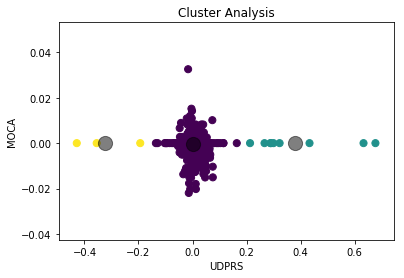

In [139]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter( X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("Cluster Analysis")
plt.xlabel("UDPRS")
plt.ylabel("MOCA")
plt.show()

#### BORUTA ANALYSIS ON FOUND DATA

In [107]:
#found_dfs.head()
#found_dfs.describe()
#just fillna with 0 for now - could be biased
model_df=pd.merge(found_dfs.fillna(0),patient_df[["PATNO","RECRUITMENT_CAT"]],on="PATNO",how='inner')

In [108]:
#Not sure what the different categories mean, but let's seek to use them anyway
pd_cat=['PD','GENPD','REGPD','PRODROMA']
hc_cat=['GENUN','HC']

model_df['Diag']=""
model_df.loc[model_df['RECRUITMENT_CAT'].isin(pd_cat), 'Diag'] = "PD"
model_df.loc[model_df['RECRUITMENT_CAT'].isin(hc_cat), 'Diag'] = "HC"

model_df=model_df[(model_df['Diag'].isin(["HC","PD"]))]


print(model_df['Diag'].value_counts())
print(model_df['RECRUITMENT_CAT'].value_counts())
X=np.asarray(model_df.select_dtypes([np.number]).drop('PATNO',axis=1))
y=np.asarray(model_df['Diag'])
#print(model_df['RECRUITMENT_CAT'].value_counts())
#y=np.asarray(model_df['RECRUITMENT_CAT'])

HC    197
PD    169
Name: Diag, dtype: int64
GENUN       146
PD           89
HC           51
GENPD        36
REGPD        30
PRODROMA     14
Name: RECRUITMENT_CAT, dtype: int64


In [110]:
biospec_mod=pd.merge(ur_sum[(ur_sum['EVENT_ID']=="BL")].drop('EVENT_ID',axis=1),
                     csf[(csf['EVENT_ID']=="BL")].drop(['EVENT_ID','RUNDATE'],axis=1),on='PATNO',how='inner')
biospec_mod=pd.merge(biospec_mod,patient_df[["PATNO","RECRUITMENT_CAT"]],on="PATNO",how='inner')

biospec_mod['Diag']=""
biospec_mod.loc[biospec_mod['RECRUITMENT_CAT'].isin(pd_cat), 'Diag'] = "PD"
biospec_mod.loc[biospec_mod['RECRUITMENT_CAT'].isin(hc_cat), 'Diag'] = "HC"
biospec_mod=biospec_mod[(biospec_mod['Diag'].isin(["HC","PD"]))]

biospec_mod

,PATNO,"2,2' di-22:6-BMP",total di-18:1-BMP,total di-22:6-BMP,CSF Alpha-synuclein,CSF Hemoglobin,pTau,tTau,RECRUITMENT_CAT,Diag
0,3000,4.51,0.65,6.53,1798.9,437.4,17.50,213.4,HC,HC
1,3001,4.34,2.79,6.56,1798.9,437.4,17.50,213.4,PD,PD
2,3001,4.34,2.79,6.56,1798.9,437.4,17.50,213.4,PD,PD
3,3002,29.27,4.42,37.48,1798.9,437.4,17.50,213.4,PD,PD
4,3002,29.27,4.42,37.48,1798.9,437.4,17.50,213.4,PD,PD
...,...,...,...,...,...,...,...,...,...,...
587,52854,75.51,9.78,96.15,1538.2,217.4,9.43,119.9,GENUN,HC
588,65000,77.93,5.97,109.24,782.0,NaN,8.91,118.6,GENUN,HC
589,65002,54.17,9.16,62.42,782.0,NaN,8.91,118.6,GENUN,HC
590,65003,18.99,21.58,21.96,1234.0,976.1,9.46,119.7,GENUN,HC


In [111]:
model_df.to_csv('%s%s' % (in_dat,'model_found_data.csv'))
biospec_mod.to_csv('%s%s' % (in_dat,'biospec_mod.csv'))


In [240]:
features=model_df.select_dtypes(['number']).drop('PATNO',axis=1).columns
features

Index(['compbyal', 'compby_relativespecifyal', 'compby_otherspecifyal', 'alq1',
       'alq2', 'alq3_age', 'alq3_year', 'alq3_9999', 'alq4', 'alq4_age',
       ...
       'tx5c1_stop2', 'tx5c12_9999', 'tx5c12_more', 'tx5c1_start3',
       'tx5c1_stop3', 'tx5c13_9999', 'tx5dmetal_2', 'tx5dmetal_3', 'tx6',
       'toxicant_complete'],
      dtype='object', length=1376)

In [231]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=4242, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X, y)

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=207, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x12ac64870>,
            verbose=0, warm_start=False),
     max_iter=50, n_estimators='auto', perc=90,
     random_state=<mtrand.RandomState object at 0x12ac64870>,
     two_step=True, verbose=0)

In [234]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['alq3_age', 'alq6a', 'alq6d', 'nsq1a_age', 'nsq2d', 'cfqa1', 'cfqa2age', 'cfa3', 'cfqa5day', 'cfqad2age', 'cfqd2age', 'ismale', 'compbyrq', 'rp2', 'rp3', 'rp3choice5_age', 'rp4c', 'hiqa1_age', 'bp2', 'bp2a_lb', 'bp3', 'bp3a_lb', 'bp4a_lb', 'ocq2', 'ocq2c', 'ocq2c1age', 'phb2', 'pa2c', 'pa5c', 'pa6c', 'pa7a', 'pa7b', 'pa7c', 'rsqd2', 'rsqe2', 'rsqf2', 'rsqg2', 'rsqh1yrs', 'smq3_year', 'tx1a_age', 'tx1d_wood', 'tx1d_super', 'tx1d_contact', 'tx6']


In [236]:
names=F_Alc.columns
F_data_dic[['ITM_NAME','DSCR','MOD_NAME']][(F_data_dic['ITM_NAME'].isin(final_features))]

,ITM_NAME,DSCR,MOD_NAME
13,smq3_year,3) At what age (or in what year) did you first...,RFQ_smoking
52,cfqa1,"A1) In your lifetime, have you ever regularly ...",RFQ_caffeine
53,cfqa2age,A2) At what age (or in what year) did you firs...,RFQ_caffeine
56,cfa3,A3) Do you currently drink caffeinated coffee?,RFQ_caffeine
72,cfqa5day,A5) During the time you were regularly drinkin...,RFQ_caffeine
76,cfqad2age,B2) At what age (or in what year) did you firs...,RFQ_caffeine
192,cfqd2age,G2) At what age (or in what year) did you firs...,RFQ_caffeine
299,bp2,Select the number of the picture below that be...,RFQ_height_and_weight
303,bp2a_lb,What was your weight at age 25?,RFQ_height_and_weight
306,bp3,Select the number of the picture below that be...,RFQ_height_and_weight


Merge with the data dictionary file to determine the names of these variables

# OLD

In [106]:
check=list_of_dfs[files_csv.index('MDS_UPDRS_Part_I__Patient_Questionnaire.csv')]

#PATNO
#'MDS_UPDRS_Part_I.csv', 'MDS_UPDRS_Part_III.csv',
 #       'MDS_UPDRS_Part_II__Patient_Questionnaire.csv',
 #       'MDS_UPDRS_Part_I__Patient_Questionnaire.csv'
#check=list_of_dfs[files_csv.index('MDS_UPDRS_Part_I.csv')]
#SE2=SE2[['PATNO','BIRTHDT', 'GENDER']]
print(check.groupby(['PATNO']).size())
print(check.groupby(['PATNO','EVENT_ID']).size())
print(check.columns)

PATNO
3000      7
3001     16
3002     16
3003     16
3004      7
         ..
92138     1
92490    11
92516     1
92560     1
92834    12
Length: 2136, dtype: int64
PATNO  EVENT_ID
3000   BL          1
       V04         1
       V06         1
       V08         1
       V10         1
                  ..
92834  V07         1
       V08         1
       V09         1
       V10         1
       V11         1
Length: 13489, dtype: int64
Index(['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT',
       'NUPSOURC', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST',
       'NP1LTHD', 'NP1FATG', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV',
       'filename'],
      dtype='object')


In [81]:
#Family History
FHPD=df_describe("Family_History__PD_.csv")
#UDPRS
#UDPRS_sel1=df_describe("MDS_UPDRS_Part_I.csv")
#UDPRS_sel2=df_describe('MDS_UPDRS_Part_II__Patient_Questionnaire.csv')
UDPRS_sel3=df_describe("MDS_UPDRS_Part_III.csv")
gerdepr=df_describe('Geriatric_Depression_Scale__Short_.csv')
#MOCA

[array(['REC_ID', 'PATNO', 'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD',
       'FULSIB', 'FULSIBPD', 'HAFSIB', 'HAFSIBPD', 'MAGPAR', 'MAGPARPD',
       'PAGPAR', 'PAGPARPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD',
       'KIDSNUM', 'KIDSPD', 'QUERY', 'EVENT_ID'], dtype=object)]


,REC_ID,PATNO,BIOMOM,BIOMOMPD,BIODAD,BIODADPD,FULSIB,FULSIBPD,HAFSIB,HAFSIBPD,...,MAGPARPD,PAGPAR,PAGPARPD,MATAU,MATAUPD,PATAU,PATAUPD,KIDSNUM,KIDSPD,QUERY
count,2.160000e+03,2160.000000,2160.0,2153.000000,2159.0,2151.000000,2154.000000,2016.000000,2154.000000,572.000000,...,2151.000000,2160.000000,2144.000000,2145.000000,2004.000000,2129.000000,1974.000000,2153.000000,1837.000000,0.0
mean,4.859840e+08,32726.569907,1.0,0.156990,1.0,0.205021,2.181058,0.141369,0.211235,0.024476,...,0.081358,1.996296,0.079291,3.159907,0.138224,3.126350,0.126140,1.900139,0.015787,NaN
std,1.416794e+08,25776.416095,0.0,0.363876,0.0,0.403811,1.731566,0.418380,0.783269,0.203547,...,0.289958,0.086006,0.283733,2.731122,0.488874,2.724766,0.480534,1.289709,0.137164,NaN
min,2.267032e+08,3000.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.545217e+08,3752.750000,1.0,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN
50%,4.905366e+08,40919.000000,1.0,0.000000,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,NaN
75%,6.037834e+08,53308.500000,1.0,0.000000,1.0,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,4.000000,0.000000,4.000000,0.000000,3.000000,0.000000,NaN
max,7.610051e+08,92834.000000,1.0,1.000000,1.0,1.000000,15.000000,4.000000,9.000000,3.000000,...,2.000000,2.000000,2.000000,21.000000,6.000000,18.000000,8.000000,9.000000,2.000000,NaN


,REC_ID,PATNO,BIOMOM,BIOMOMPD,BIODAD,BIODADPD,FULSIB,FULSIBPD,HAFSIB,HAFSIBPD,...,PAGPAR,PAGPARPD,MATAU,MATAUPD,PATAU,PATAUPD,KIDSNUM,KIDSPD,QUERY,EVENT_ID
0,226912501,3403,1,0.0,1.0,0.0,3.0,0.0,0.0,NaN,...,2,0.0,4.0,0.0,1.0,0.0,3.0,0.0,NaN,SC
1,229758101,3402,1,0.0,1.0,0.0,3.0,0.0,0.0,NaN,...,2,0.0,2.0,0.0,2.0,0.0,4.0,0.0,NaN,SC
2,226872001,3401,1,0.0,1.0,0.0,2.0,0.0,0.0,NaN,...,2,0.0,1.0,0.0,1.0,0.0,2.0,0.0,NaN,SC
3,233877701,3404,1,0.0,1.0,0.0,3.0,0.0,0.0,0.0,...,2,0.0,2.0,0.0,6.0,0.0,2.0,0.0,NaN,SC
4,232504901,3405,1,0.0,1.0,0.0,2.0,0.0,0.0,NaN,...,2,0.0,4.0,0.0,6.0,0.0,NaN,NaN,NaN,SC


[array(['REC_ID', 'PATNO', 'PDSTATE', 'DBS_STATUS', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL',
       'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR',
       'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL',
       'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR',
       'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML',
       'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON', 'DYSKPRES', 'DYSKIRAT', 'NHY',
       'ANNUAL_TIME_BTW_DOSE_NUPDRS', 'ON_OFF_DOSE', 'PD_MED_USE',
       'EVENT_ID'], dtype=object)]


,REC_ID,PATNO,PDSTATE,DBS_STATUS,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,PN3RIGRL,...,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,DYSKPRES,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE
count,1.531800e+04,15318.000000,948.000000,137.000000,15316.000000,15315.000000,15315.000000,15315.000000,15315.000000,15313.000000,...,15314.000000,15314.000000,15313.000000,15312.000000,15310.000000,1042.000000,15308.000000,6626.000000,6654.000000,10191.000000
mean,5.470915e+08,23079.789725,2.090717,0.883212,0.478193,0.893177,0.614561,0.832191,0.700947,0.537778,...,0.118388,0.111532,0.056161,0.849073,0.052449,0.053743,1.286713,6.846760,1.633604,2.490335
std,1.375957e+08,24501.541399,0.996402,0.322346,0.661211,0.861404,0.835877,0.879984,0.860839,0.809846,...,0.423804,0.411700,0.276389,1.218053,0.222939,0.225618,0.977456,8.522171,0.481856,2.409150
min,2.309658e+08,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.218114e+08,3439.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.423325,1.000000,0.000000
50%,5.525583e+08,4022.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.133300,2.000000,1.000000
75%,6.694939e+08,42379.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,12.000000,2.000000,4.000000
max,7.618467e+08,92834.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,1.000000,1.000000,5.000000,99.000000,2.000000,7.000000


,REC_ID,PATNO,PDSTATE,DBS_STATUS,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,PN3RIGRL,...,NP3RTALL,NP3RTALJ,NP3RTCON,DYSKPRES,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,EVENT_ID
0,388801201,3904,NaN,NaN,3.0,4.0,2.0,3.0,2.0,3.0,...,0.0,0.0,4.0,0.0,NaN,2.0,NaN,NaN,0.0,V02
1,388836101,3916,NaN,NaN,2.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,0.0,NaN,2.0,NaN,NaN,NaN,SC
2,388840801,3915,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,...,0.0,0.0,2.0,0.0,NaN,2.0,NaN,NaN,NaN,BL
3,388845001,3591,NaN,NaN,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,BL
4,388915001,4114,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,3.0,0.0,NaN,2.0,NaN,NaN,NaN,SC


[array(['REC_ID', 'PATNO', 'GDSSATIS', 'GDSDROPD', 'GDSEMPTY', 'GDSBORED',
       'GDSGSPIR', 'GDSAFRAD', 'GDSHAPPY', 'GDSHLPLS', 'GDSHOME',
       'GDSMEMRY', 'GDSALIVE', 'GDSWRTLS', 'GDSENRGY', 'GDSHOPLS',
       'GDSBETER', 'EVENT_ID'], dtype=object)]


,REC_ID,PATNO,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,GDSAFRAD,GDSHAPPY,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER
count,8.249000e+03,8249.000000,8246.000000,8245.000000,8247.000000,8248.000000,8247.000000,8248.000000,8246.000000,8246.000000,8246.000000,8247.000000,8245.000000,8245.000000,8242.000000,8248.000000,8248.000000
mean,5.534228e+08,24050.140744,0.900073,0.191631,0.071662,0.130820,0.884079,0.157129,0.840044,0.098957,0.303541,0.225900,0.891449,0.067556,0.523781,0.065349,0.094811
std,1.392416e+08,25475.727094,0.299921,0.393608,0.257944,0.337223,0.320150,0.363944,0.366588,0.298622,0.459815,0.418199,0.311093,0.250998,0.499464,0.247156,0.292971
min,2.317440e+08,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.261391e+08,3447.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.624684e+08,4019.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.796670e+08,50195.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,7.622866e+08,92834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,REC_ID,PATNO,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,GDSAFRAD,GDSHAPPY,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,EVENT_ID
0,234843501,3404,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BL
1,233822201,3400,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BL
2,232534901,3401,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,BL
3,231744001,3403,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BL
4,236092601,3405,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,BL


In [50]:
UDPRS_sel3[['PATNO','EVENT_ID','NP3SPCH', 'NP3FACXP','NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL','NP3FTAPR', 'NP3FTAPL',
            'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR',
       'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL','NP3RISNG', 'NP3GAIT','NP3FRZGT', 'NP3PSTBL', 'NP3POSTR',
       'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML','NP3RTARU', 'NP3RTALU',
            'NP3RTARL', 'NP3RTALL',
            'NP3RTALJ','NP3RTCON']].sort_values(by=['PATNO','EVENT_ID']).head(20)

,PATNO,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,PN3RIGRL,NP3RIGLL,NP3FTAPR,...,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON
12593,3000,BL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11059,3000,V04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11490,3000,V06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5405,3000,V08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9393,3000,V10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8018,3000,V12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13721,3000,V14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,3000,V15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12616,3001,BL,1.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12602,3001,SC,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'MDS_UPDRS_Part_III.csv',
       'MDS_UPDRS_Part_II__Patient_Questionnaire.csv',

Run Boruta to attempt to get most important features out

In [57]:
#pd.set_option('display.max_columns', 500)
k=files_csv.index("MDS_UPDRS_Part_III.csv")
#k=files_csv.index(filesgnpats(1500)[6])
#k=filesgnpats(1500)
#udprs3lkup=file_examine(k,filenamedescs)
#udprs3lkup[(udprs3lkup['field'].str.contains("NP3"))]
check=file_examine(k,filenamedescs)

'MDS_UPDRS_Part_III.csv'

distinct patno 2134
Number of records (15318, 55)


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PDMEDDT,PDMEDTM,PDSTATE,EXAMTM,...,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,388801201,V,3904,V02,NUPDRS3,03/2013,NaN,NaN,NaN,10:23:00,...,NaN,2.0,NaN,NaN,0.0,03/2013,2013-03-12 06:30:02.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
1,388836101,V,3916,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 08:53:56.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
2,388840801,V,3915,BL,NUPDRS3,03/2013,NaN,NaN,NaN,16:30:00,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 09:03:29.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
3,388845001,V,3591,BL,NUPDRS3,03/2013,NaN,NaN,NaN,11:54:00,...,NaN,1.0,NaN,NaN,NaN,03/2013,2013-03-12 09:14:32.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
4,388915001,V,4114,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 12:46:29.0,NaN,03/2013,MDS_UPDRS_Part_III.csv


(15318, 55)


,field,DSCR,0
0,DBS_STATUS,"0 = OFF, 1 = ON",2
1,DYSKIRAT,3.20 Did movements interfere with rating,2
2,DYSKPRES,3.19 Were dyskinesias present,2
3,EVENT_ID,Event Name,131
4,EVENT_ID,Visit Number,1
...,...,...,...
57,PD_MED_USE,"0=No,1=Lv,2=Ag,3=Oth,4=1+3,5=1+2,6=2+3,7=1+2+3",2
58,PN3RIGRL,3.3d Rigidity - RLE,2
59,QUERY,Any open/pending queries on this record,122
60,REC_ID,Record ID,124


,field,DSCR,0
11,NP3BRADY,3.14 Global spontaneity of movement,2
12,NP3FACXP,3.2 Facial expression,2
13,NP3FRZGT,3.11 Freezing of gait,2
14,NP3FTAPL,3.4b Finger Tapping Left Hand,2
15,NP3FTAPR,3.4a Finger Tapping Right Hand,2
16,NP3GAIT,3.10 Gait,2
17,NP3HMOVL,3.5b Hand movements - Left Hand,2
18,NP3HMOVR,3.5a Hand movements - Right Hand,2
19,NP3KTRML,3.16b Kinetic tremor - Left hand,2
20,NP3KTRMR,3.16a Kinetic tremor - Right hand,2


In [58]:
l=files_csv.index("Patient_Status.csv")
pat_stat=list_of_dfs[l]
pat_stat['PATNO']=pat_stat["PATNO"].astype(str)
pat_stat=pat_stat[pd.notnull(pat_stat["RECRUITMENT_CAT"])]
moca=createdataf("Montreal_Cognitive_Assessment__MoCA_.csv")
Dem=createdataf("Screening___Demographics.csv")
MDS_UPDRS_Part_I=createdataf("MDS_UPDRS_Part_I.csv")
#pats_samp=pd.merge(pat_stat,moca,on="PATNO",how='left')
pats_samp=pd.merge(pat_stat,Dem,on="PATNO",how='left')
#pats_samp=pd.merge(MDS_UPDRS_Part_I,Dem,on="PATNO",how='left')
pats_samp['PATNO']=pats_samp['PATNO'].astype(str)
#pats_samp
#pats_samp2=pd.merge(pats_samp,pat_stat,on="PATNO",how='left')

In [39]:
MDS_UPDRS_Part_III=createdataf("MDS_UPDRS_Part_III.csv")

In [41]:
MDS_UPDRS_Part_I.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,231798601,V,3402,SC,NUPDRS1,07/2010,1,0,0,1,0.0,2.0,0.0,07/2010,2010-07-09 12:00:30.0,NaN,07/2010,MDS_UPDRS_Part_I.csv
1,233164301,V,3400,BL,NUPDRS1,07/2010,1,0,0,2,3.0,2.0,0.0,07/2010,2010-07-15 17:04:33.0,NaN,07/2010,MDS_UPDRS_Part_I.csv
2,230955201,V,3403,SC,NUPDRS1,07/2010,1,0,0,0,0.0,0.0,0.0,07/2010,2010-07-06 13:03:54.0,NaN,07/2010,MDS_UPDRS_Part_I.csv
3,234837501,V,3404,BL,NUPDRS1,07/2010,1,0,0,0,0.0,0.0,0.0,07/2010,2010-07-23 11:30:12.0,NaN,07/2010,MDS_UPDRS_Part_I.csv
4,232712901,V,3406,SC,NUPDRS1,07/2010,1,0,0,0,1.0,1.0,0.0,07/2010,2010-07-14 08:54:29.0,NaN,07/2010,MDS_UPDRS_Part_I.csv


In [38]:
moca_sum=pd.DataFrame(moca.groupby("PATNO")['MCATOT'].sum()).reset_index()
moca_sum.columns=["PATNO","MCATOT"]
#moca_sum["PATNO"][(moca_sum['recs']==1)].count()/moca_sum["PATNO"].count()
moca_sum.shape

(2175, 2)

In [29]:
pats_samp.columns

Index(['PATNO', 'RECRUITMENT_CAT', 'IMAGING_CAT', 'ENROLL_DATE', 'ENROLL_CAT',
       'ENROLL_STATUS', 'DESCRP_CAT', 'STATUS_DATE', 'filename_x', 'REC_ID',
       'F_STATUS', 'EVENT_ID', 'PAG_NAME', 'SIGNCNST', 'CONSNTDT', 'APPRDX',
       'CURRENT_APPRDX', 'P3GRP', 'BIRTHDT', 'GENDER', 'HISPLAT', 'RAINDALS',
       'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAWHITE', 'RANOS', 'PRJENRDT',
       'REFERRAL', 'DECLINED', 'RSNDEC', 'EXCLUDED', 'RSNEXC', 'ORIG_ENTRY',
       'LAST_UPDATE', 'QUERY', 'SITE_APRV', 'filename_y'],
      dtype='object')

Export csv 

In [30]:
pats_samp.to_csv('%s%s' % (in_dat,"patient_metadata_20200117.csv"))

In [18]:
pat_stat["RECRUITMENT_CAT"].value_counts()

PD          570
GENUN       446
GENPD       300
REGUN       253
HC          241
PRODROMA    216
REGPD       208
Name: RECRUITMENT_CAT, dtype: int64

In [46]:
moca,udprs=createdataf("Montreal_Cognitive_Assessment__MoCA_.csv"),createdataf("MDS_UPDRS_Part_I.csv")

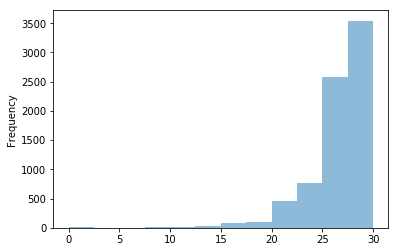

In [20]:
moca["MCATOT"].plot.hist(bins=12, alpha=0.5)
plt.show()

In [21]:
pats_samp2=pd.merge(pats_samp2,moca,on="PATNO",how='left')
#pats_samp2.sample(20)

NameError: name 'pats_samp2' is not defined

In [22]:
Dem=createdataf("Screening___Demographics.csv")
Dem.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,SIGNCNST,CONSNTDT,APPRDX,CURRENT_APPRDX,P3GRP,...,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,224392801,V,3400,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,60.0,NaN,NaN,NaN,NaN,06/2010,2010-12-17 10:58:57.0,NaN,07/2010,Screening___Demographics.csv
1,224394301,V,3401,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 08:09:56.0,NaN,07/2010,Screening___Demographics.csv
2,224398401,V,3402,CONSENT,SCREEN,1.0,06/2010,3.0,3.0,NaN,...,1.0,NaN,NaN,NaN,NaN,06/2010,2011-09-27 12:12:25.0,NaN,07/2010,Screening___Demographics.csv
3,224400201,V,3403,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 08:35:45.0,NaN,07/2010,Screening___Demographics.csv
4,224718101,V,3404,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,1.0,NaN,NaN,NaN,NaN,06/2010,2010-07-20 09:00:48.0,NaN,07/2010,Screening___Demographics.csv


In [23]:
Dem.columns

Index(['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'SIGNCNST',
       'CONSNTDT', 'APPRDX', 'CURRENT_APPRDX', 'P3GRP', 'BIRTHDT', 'GENDER',
       'HISPLAT', 'RAINDALS', 'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAWHITE',
       'RANOS', 'PRJENRDT', 'REFERRAL', 'DECLINED', 'RSNDEC', 'EXCLUDED',
       'RSNEXC', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV',
       'filename'],
      dtype='object')

In [24]:
Dem[['PATNO',"BIRTHDT","GENDER",'RAASIAN', 'RABLACK', 'RAHAWOPI', 'RAWHITE','SIGNCNST']]

,PATNO,BIRTHDT,GENDER,RAASIAN,RABLACK,RAHAWOPI,RAWHITE,SIGNCNST
0,3400,1971.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3401,1954.0,1.0,0.0,0.0,0.0,1.0,1.0
2,3402,1964.0,2.0,0.0,0.0,0.0,1.0,1.0
3,3403,1941.0,2.0,0.0,0.0,0.0,1.0,1.0
4,3404,1954.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2249,5012,1952.0,2.0,0.0,0.0,0.0,1.0,1.0
2250,5013,1962.0,2.0,0.0,0.0,0.0,1.0,1.0
2251,5014,1953.0,2.0,0.0,0.0,0.0,1.0,1.0
2252,5015,1956.0,1.0,0.0,0.0,0.0,1.0,1.0


In [25]:
Clinical_Labs=createdataf("Clinical_Labs.csv")
Clinical_Labs.head()


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,BLDLAB,BLDSHPDT,COMM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,226845701,V,3400,SC,LAB,06/2010,1,06/2010,NaN,06/2010,2010-07-14 10:27:53.0,NaN,07/2010,Clinical_Labs.csv
1,226877401,V,3401,SC,LAB,06/2010,1,06/2010,NaN,06/2010,2010-07-14 10:28:44.0,NaN,06/2010,Clinical_Labs.csv
2,226894001,V,3402,SC,LAB,06/2010,1,06/2010,NaN,06/2010,2010-07-14 10:29:36.0,NaN,06/2010,Clinical_Labs.csv
3,226921901,V,3403,SC,LAB,06/2010,1,06/2010,NaN,06/2010,2010-07-14 10:31:53.0,NaN,07/2010,Clinical_Labs.csv
4,232503101,V,3405,SC,LAB,07/2010,1,07/2010,NaN,07/2010,2010-07-13 12:39:35.0,NaN,07/2010,Clinical_Labs.csv


In [26]:
REM=createdataf("REM_Sleep_Disorder_Questionnaire.csv")
REM.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,DRMVIVID,DRMAGRAC,DRMNOCTB,...,DEPRS,EPILEPSY,BRNINFM,CNSOTH,CNSOTHCM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,232534301,V,3401,BL,REMSLEEP,07/2010,1.0,1,0,0.0,...,0.0,0.0,0.0,0.0,NaN,07/2010,2010-07-13 13:46:12.0,NaN,07/2010,REM_Sleep_Disorder_Questionnaire.csv
1,233821601,V,3400,BL,REMSLEEP,07/2010,1.0,1,1,0.0,...,1.0,0.0,0.0,0.0,NaN,07/2010,2010-07-20 07:19:50.0,NaN,07/2010,REM_Sleep_Disorder_Questionnaire.csv
2,234843201,V,3404,BL,REMSLEEP,07/2010,1.0,1,0,0.0,...,0.0,0.0,0.0,0.0,NaN,07/2010,2010-07-23 11:55:28.0,NaN,07/2010,REM_Sleep_Disorder_Questionnaire.csv
3,231743401,V,3403,BL,REMSLEEP,07/2010,1.0,1,1,0.0,...,0.0,0.0,0.0,0.0,NaN,07/2010,2010-07-09 09:41:25.0,NaN,07/2010,REM_Sleep_Disorder_Questionnaire.csv
4,236092401,V,3405,BL,REMSLEEP,07/2010,1.0,1,1,0.0,...,0.0,0.0,0.0,0.0,NaN,07/2010,2010-07-30 10:27:21.0,NaN,07/2010,REM_Sleep_Disorder_Questionnaire.csv


In [27]:
MDS_UPDRS_Part_I=createdataf("MDS_UPDRS_Part_I.csv")
MDS_UPDRS_Part_I.head()
MDS_UPDRS_Part_III=createdataf("MDS_UPDRS_Part_III.csv")
MDS_UPDRS_Part_III.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PDMEDDT,PDMEDTM,PDSTATE,EXAMTM,...,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV,filename
0,388801201,V,3904,V02,NUPDRS3,03/2013,NaN,NaN,NaN,10:23:00,...,NaN,2.0,NaN,NaN,0.0,03/2013,2013-03-12 06:30:02.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
1,388836101,V,3916,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 08:53:56.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
2,388840801,V,3915,BL,NUPDRS3,03/2013,NaN,NaN,NaN,16:30:00,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 09:03:29.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
3,388845001,V,3591,BL,NUPDRS3,03/2013,NaN,NaN,NaN,11:54:00,...,NaN,1.0,NaN,NaN,NaN,03/2013,2013-03-12 09:14:32.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
4,388915001,V,4114,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 12:46:29.0,NaN,03/2013,MDS_UPDRS_Part_III.csv
